In [2]:

import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from importlib import reload  
# Custom packages
import util
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [53]:
#quad_r1 = pd.read_csv('./data/SL4-1_cells_umis_tripbc_intranscriptome_denoise_oinboutput_final_trio.csv')
#quad_r2 = pd.read_csv('./data/SL4-2_cells_umis_tripbc_intranscriptome_denoise_oinboutput_final_trio.csv')
## Add -1 and -2 to cell barcodes because of the large number of cell barcode overlap -- strange
#quad_r1['cellBC'] = quad_r1['cellBC'].apply(lambda x: x + '-1')
## quad_r2['cellBC'] = quad_r2['cellBC'].apply(lambda x: x + '-2')
## Merge the two dataframes
#final_quad = pd.concat([quad_r1, quad_r2])
#final_quad.to_csv('scTRIP_final_tiro_merged.csv', index = False)
quad = pd.read_csv('scTRIP_final_tiro_merged.csv')
quad = quad.drop_duplicates()
#normed_cell = util.filter_based_on_umi(quad_r1)
#normed_cell.to_csv('SL4-1_normed_cell.csv', index = False)
#normed_cell = pd.read_csv('./SL4-1_normed_cell.csv')

In [54]:
# Process the mapped tBC info
mapped_info = pd.read_csv('all_CAS_pools_combined.tsv', sep='\t')
mapped_info_lp1 = mapped_info.loc[mapped_info.id.str.contains('_LP1_latest')]
mapped_tBC = mapped_info_lp1.tBC.to_list()

In [55]:
# filter tBC based on the mapped tBC
quad = quad[quad.tBC.isin(mapped_tBC)]

In [111]:
len(quad.tBC.unique())

468

### Check overlap of cell barcodes

In [42]:
shared_barcodes = set(quad_r1.cellBC.unique()).intersection(set(quad_r2.cellBC.unique()))
rep1_shared_cells = quad_r1[quad_r1.cellBC.isin(shared_barcodes)]
rep2_shared_cells = quad_r2[quad_r2.cellBC.isin(shared_barcodes)]
overlap = []
for cellBC in shared_barcodes:
    rep1_cell = rep1_shared_cells[rep1_shared_cells.cellBC == cellBC]
    rep2_cell = rep2_shared_cells[rep2_shared_cells.cellBC == cellBC]
    overlap_num = len(set(rep1_cell.tBC.unique()).intersection(set(rep2_cell.tBC.unique())))/len(set(rep1_cell.tBC.unique()).union(set(rep2_cell.tBC.unique())))
    overlap.append(overlap_num)

import random
rep1_bcs = random.sample(list(quad_r1.cellBC.unique()), len(shared_barcodes))
rep2_bcs = random.sample(list(quad_r2.cellBC.unique()), len(shared_barcodes))
quad_r1_sub = quad_r1[quad_r1.cellBC.isin(rep1_bcs)]
quad_r2_sub = quad_r2[quad_r2.cellBC.isin(rep2_bcs)]
quad_r1_sub = quad_r1_sub.loc[quad_r1_sub['count'] > 2]
quad_r2_sub = quad_r2_sub.loc[quad_r2_sub['count'] > 2]
overlap_random = []
for bc_1, bc_2 in zip(rep1_bcs, rep2_bcs):
    rep1_cell = quad_r1_sub[quad_r1_sub.cellBC == bc_1]
    rep2_cell = quad_r2_sub[quad_r2_sub.cellBC == bc_2]
    overlap_num = len(set(rep1_cell.tBC.unique()).intersection(set(rep2_cell.tBC.unique())))/len(set(rep1_cell.tBC.unique()).union(set(rep2_cell.tBC.unique())))
    overlap_random.append(overlap_num)

plt.xlabel('percentage of overlap')
plt.hist(overlap, bins = 'auto', density= True, alpha = 0.5)
plt.hist(overlap_random, bins = 'auto', density = True, alpha = 0.5)
plt.legend(['overlap barcodes', 'random overlap'])
    

In [168]:
normed_cell = util.filter_based_on_umi(quad)
#normed_cell.to_csv('scTRIP_LP1_normed_cell.csv', index = False)

we have finished 0.0% of the operation
we have finished 0.86% of the operation
we have finished 1.72% of the operation
we have finished 2.59% of the operation
we have finished 3.45% of the operation
we have finished 4.31% of the operation
we have finished 5.17% of the operation
we have finished 6.04% of the operation
we have finished 6.9% of the operation
we have finished 7.76% of the operation
we have finished 8.62% of the operation
we have finished 9.48% of the operation
we have finished 10.35% of the operation
we have finished 11.21% of the operation
we have finished 12.07% of the operation
we have finished 12.93% of the operation
we have finished 13.79% of the operation
we have finished 14.66% of the operation
we have finished 15.52% of the operation
we have finished 16.38% of the operation
we have finished 17.24% of the operation
we have finished 18.11% of the operation
we have finished 18.97% of the operation
we have finished 19.83% of the operation
we have finished 20.69% of the

## tBC behavior on per-cell level

### Data visualization
- There is a order of magnitude reduction of the number of tBCs when I manually identify the "elbow" point. 
- I think the number is reasonable on the order of $10^0$ to $10^1$. 

In [90]:
import random
testcellBC = random.sample(quad['cellBC'].to_list(),5)
test_cell = quad.loc[quad.cellBC.isin(testcellBC)]

<ipython-input-57-76dc0150efca>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,num_plot,i+1)


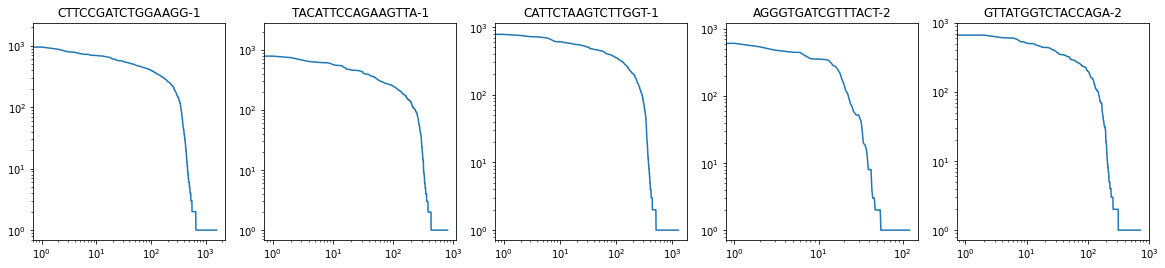

In [57]:
fig = plt.figure(figsize = (20,4))
num_plot = len(set(test_cell['cellBC']))
axes = plt.subplot(1,num_plot,1)
for i in range(num_plot):
    plt.subplot(1,num_plot,i+1)
    test_cell_i = test_cell.loc[test_cell.cellBC == testcellBC[i]]
    count_list = test_cell_i['count'].to_list()
    count_list.sort(reverse = True)
    x_count = np.arange(len(count_list))
    plt.plot(x_count, count_list)
    plt.title(f'{testcellBC[i]}')
    plt.xscale('log')
    plt.yscale('log')



In [91]:
normed_test_cell = util.filter_based_on_umi(test_cell)

we have finished 0.0% of the operation


In [72]:
reload(util)
#normed_test_cell = normed_cell.loc[normed_cell.cellBC.isin(testcellBC)]
normed_test_cell = util.filter_based_on_umi(test_cell)
normed_cell = util.filter_based_on_umi(quad)

we have finished 0.0% of the operation
we have finished 0.0% of the operation
we have finished 0.86% of the operation
we have finished 1.73% of the operation
we have finished 2.59% of the operation
we have finished 3.45% of the operation
we have finished 4.31% of the operation
we have finished 5.18% of the operation
we have finished 6.04% of the operation
we have finished 6.9% of the operation
we have finished 7.76% of the operation
we have finished 8.63% of the operation
we have finished 9.49% of the operation
we have finished 10.35% of the operation
we have finished 11.21% of the operation
we have finished 12.08% of the operation
we have finished 12.94% of the operation
we have finished 13.8% of the operation
we have finished 14.67% of the operation
we have finished 15.53% of the operation
we have finished 16.39% of the operation
we have finished 17.25% of the operation
we have finished 18.12% of the operation
we have finished 18.98% of the operation
we have finished 19.84% of the op

In [74]:
normed_cell = normed_cell.drop_duplicates()
#normed_cell.to_csv('220329_normed_cell_umi.csv', index = False)

In [92]:
normed_test_cell = normed_test_cell.drop_duplicates()

<ipython-input-87-4ee189cd7f2d>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,num_plot,i+1)


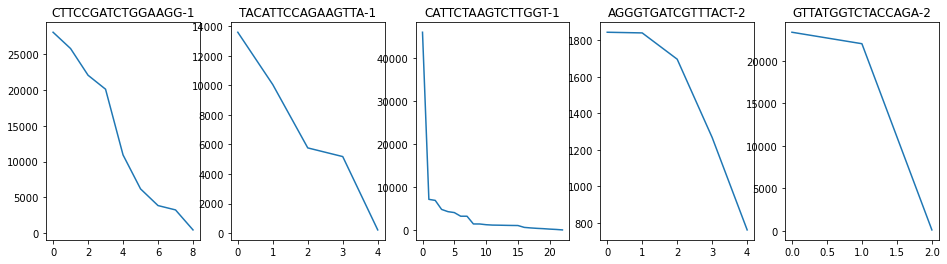

In [87]:
fig = plt.figure(figsize = (16,4))
num_plot = len(set(normed_test_cell['cellBC']))
axes = plt.subplot(1,num_plot,1)
for i in range(num_plot):
    plt.subplot(1,num_plot,i+1)
    test_cell_i = normed_test_cell.loc[normed_test_cell.cellBC == testcellBC[i]]
    count_list = test_cell_i['norm_depth'].to_list()
    count_list.sort(reverse = True)
    x_count = np.arange(len(count_list))
    plt.plot(x_count, count_list)
    plt.title(f'{testcellBC[i]}')
    #plt.xscale('log')
    #plt.yscale('log')


### Automatic elbow detection
- Here I want to implement an automatic elbow detection with the Needle algorithm

<ipython-input-93-a14ef6ab2460>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,num_plot,i+1)
/home/siqizhao/.conda/envs/mascot/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


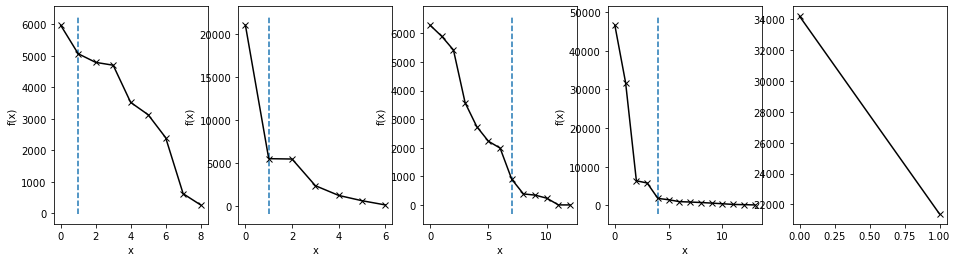

In [93]:
fig = plt.figure(figsize = (16,4))
num_plot = len(set(normed_test_cell['cellBC']))
axes = plt.subplot(1,num_plot,1)
for i in range(num_plot):
    plt.subplot(1,num_plot,i+1)
    test_cell_i = normed_test_cell.loc[normed_test_cell.cellBC == testcellBC[i]]
    count_list = test_cell_i['norm_depth'].to_list()
    count_list.sort(reverse = True)
    x_count = np.arange(len(count_list))
    kn = KneeLocator(
        x_count,
        count_list,
        curve='convex',
        direction='decreasing'
    )
    if kn.knee != None:
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.plot(x_count, count_list, 'kx-')
        plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    else:
        plt.plot(x_count, count_list, 'kx-')

In [94]:
filtered_test_cell = util.filter_based_on_depth(normed_test_cell)
len(filtered_test_cell['tBC'])

/home/siqizhao/.conda/envs/mascot/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


13

In [97]:
reload(util)
filtered_cell = util.filter_based_on_depth(normed_cell) 
#filtered_cell.to_csv('SL4-1_filtered_tBC.csv', index = False)

/home/siqizhao/.conda/envs/mascot/lib/python3.9/site-packages/kneed/knee_locator.py:218: RuntimeWarning: invalid value encountered in true_divide
  return (a - min(a)) / (max(a) - min(a))
/home/siqizhao/.conda/envs/mascot/lib/python3.9/site-packages/kneed/knee_locator.py:237: RuntimeWarning: No local maxima found in the difference curve
The line is probably not polynomial, try plotting
the difference curve with plt.plot(knee.x_difference, knee.y_difference)
Also check that you aren't mistakenly setting the curve argument
  warnings.warn(


In [100]:
#filtered_cell.to_csv('220329_lp1_filtered_tBC.csv', index = False)

In [98]:
tBC_num = []
cells = set(filtered_cell['cellBC'].to_list())
for cell in cells:
    filtered_cell_cell = filtered_cell.loc[filtered_cell.cellBC == cell]
    tBC_num.append(len(filtered_cell_cell['tBC'].to_list()))

(array([4.544e+03, 2.132e+03, 7.150e+02, 1.330e+02, 1.080e+02, 2.700e+01,
        6.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

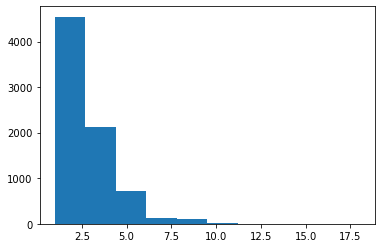

In [99]:
plt.hist(tBC_num)

## Now we ask for a any given tripBCs, the number of cells in that barcodes would overlap or not

### Temp code

In [65]:
def check_cell_overlap(df):
    tBC_list = list(set(df['tBC']))
    target_BC = tBC_list[np.random.randint(len(tBC_list)-1)]
    slice_df = df[df['tBC']==target_BC]
    target_cell_list = set(slice_df['cellBC'].to_list())
    # Now pop the old barcode
    tBC_list.remove(target_BC)
    pop_list = np.empty(len(tBC_list))
    connected_bc = []
    for idx, test_BC in enumerate(tBC_list):
        slice_df = df[df['tBC']==test_BC]
        slice_df = slice_df.loc[slice_df['count'] > 10]
        test_cell_list = set(slice_df['cellBC'].to_list())
        overlap = len(target_cell_list.intersection(test_cell_list))
        pop_list[idx]= overlap
        if overlap> 10:
            connected_bc.append(test_BC)
        if idx%100 == 0:
            print(f'we are doing {idx} tBC')
    return pop_list, connected_bc

def check_cell_overlap_known(df, target_BC):
    tBC_list = list(set(df['tBC']))
    slice_df = df[df['tBC']==target_BC]
    target_cell_list = set(slice_df['cellBC'].to_list())
    # Now pop the old barcode
    tBC_list.remove(target_BC)
    connected_bc = []
    for idx, test_BC in enumerate(tBC_list):
        slice_df = df[df['tBC']==test_BC]
        slice_df = slice_df.loc[slice_df['count'] > 200]
        test_cell_list = set(slice_df['cellBC'].to_list())
        overlap = len(target_cell_list.intersection(test_cell_list))
        if overlap> 10:
            connected_bc.append(test_BC)
    return connected_bc

In [101]:

def check_cell_overlap_weight(df, target_BC, tBC_list):
    # Remove LP1 barcode
    slice_df = df[df['tBC']==target_BC]
    target_cell_list = set(slice_df['cellBC'].to_list())
    # Now pop the old barcode
    pop_list = np.empty(len(tBC_list))
    linked_bcs = []
    for idx, test_BC in enumerate(tBC_list):
        slice_df = df[df['tBC']==test_BC]
        test_cell_list = set(slice_df['cellBC'].to_list())
        overlap = target_cell_list.intersection(test_cell_list)
        #weight = np.sum(df.loc[df.cellBC.isin(overlap), 'count'])
        #weight = len(df.loc[df.cellBC.isin(overlap)])
        weight = len(overlap)
        if weight > 10:
            linked_bcs.append(test_BC)
        if idx == len(tBC_list)-1:
            print(f'we finished a search with {idx} bcs')
    return linked_bcs

def get_clone_info(df):
    pop_dict = {}
    total_bcs = list(set(df['tBC'].to_list()))
    total_bcs.remove('AGGTTGCACGACAATC')
    # a loop structure as the number of pop_dict stops to increase
    cluster_num = 1
    while len(pop_dict) >= 0:
        # randomly choose a barcode
        test_bc = total_bcs[np.random.randint(len(total_bcs))-1]
        # pop the test barcode
        total_bcs.remove(test_bc)
        # keep the dtype as list but do set operation as set
        bc_holder = [test_bc]
        to_search_bcs = bc_holder.copy()
        to_search_bcs.remove(test_bc)
        # Start the d_change
        old_num_cluster = len(pop_dict)
        # print the number of clusters
        print(f'We are dealing with the {cluster_num} clusters!')
        time_out = 0
        # Inner loop to get all the clusters until the size stops to change 
        while len(bc_holder) >=0:
            # we do the search for the the barcodes  
            temp_bc_list = check_cell_overlap_weight(df, test_bc, total_bcs)
            # Get the old clone bcs length
            old_length = len(bc_holder) 
            print(f'the new match is {len(temp_bc_list)}')
            # takt the union of those two list and make it into the big list
            bc_holder = list(set.union(set(bc_holder), set(temp_bc_list)))
            # Get a good taste on the total list
            to_search_bcs = bc_holder.copy()
            to_search_bcs.remove(test_bc)
            if len(to_search_bcs) == 0:
                break
            # Get the new bc length
            new_length = len(bc_holder)
            print(f'The current cluster size is {new_length}')
            size_change = new_length - old_length
            print(f'The change is {size_change}')
            # if the length stops to change, break
            if size_change == 0:
                time_out +=1
            if time_out >= round(0.33*new_length):
                break
            elif time_out > 40:
                break
            # get a new test_bcs
            test_bc = to_search_bcs[np.random.randint(len(to_search_bcs))-1]
            if test_bc in total_bcs:
                total_bcs.remove(test_bc)
        ### Inner loop ends
        # Once the size stops to change, add the bc_holder to the dictionary
        if test_bc not in bc_holder:
            bc_holder.append(test_bc)
        if bc_holder not in pop_dict.values():
            pop_dict['cluster' + str(cluster_num)] = bc_holder  
            print(f'A new cluster is {bc_holder}!')
        # add 1 cluster number
        cluster_num +=1
        # Remove the already linked list
        # Should I get rid of this? 
        #total_bcs = list(set(total_bcs)-set(bc_holder))
        # break if there is no more bcs in the total_bcs_list
        if len(total_bcs) == 0:
            break 
        # Get the change 
        new_num_cluster = len(pop_dict)
        d_change = new_num_cluster - old_num_cluster
        # break if there is no more bcs to add, break and return the pop_dict
        if d_change == 0:
            break
    return pop_dict
        

### Final Code

In [175]:
import time
def get_clone_info_fast(df):
    total_bcs = list(set(df['tBC'].to_list()))
    if 'AGGTTGCACGACAATC' in total_bcs:
        total_bcs.remove('AGGTTGCACGACAATC')
    pop_list = []
   # a loop structure as the number of pop_dict stops to increase
    cluster_num = 1
    start = time.time()
    for idx, tBC in enumerate(total_bcs):
        end = time.time()
        percent = round(idx/len(total_bcs)*100, 2)
        if idx % 50 == 0:
            print(f'we are dealing with {percent}%, time has ellapsed {round(end-start,2 )}')
        connected_list = check_cell_overlap_known_v2(df, tBC)
        connected_list.append(tBC)
        pop_list.append(connected_list)
    return pop_list

def check_cell_overlap_known_v2(df, target_BC):
    tBC_list = list(set(df['tBC']))
    slice_df = df[df['tBC']==target_BC]
    target_cell_list = set(slice_df['cellBC'].to_list())
    # Now pop the old barcode
    tBC_list.remove(target_BC)
    connectome = {}
    for _, row in df.iterrows():
        tBC = row['tBC']
        cellBC = row['cellBC']
        # Check the logic here 
        if tBC not in connectome:
            connectome[tBC] = []
            if cellBC in target_cell_list:
                connectome[tBC].append(cellBC)
        elif tBC in connectome:
            if cellBC in target_cell_list:
                connectome[tBC].append(cellBC)
    # Counting
    tBC_len_dic = {k:len(v) for k, v in connectome.items()}
    # return keys with more than 20 connections
    connected_bc = [k for k, v in tBC_len_dic.items() if v > 7]
    return connected_bc

In [176]:
net = get_clone_info_fast(filtered_cell)

we are dealing with 0.0%, time has ellapsed 0.0
we are dealing with 10.94%, time has ellapsed 85.38
we are dealing with 21.88%, time has ellapsed 170.81
we are dealing with 32.82%, time has ellapsed 256.99
we are dealing with 43.76%, time has ellapsed 343.04
we are dealing with 54.7%, time has ellapsed 429.01
we are dealing with 65.65%, time has ellapsed 514.55
we are dealing with 76.59%, time has ellapsed 600.05
we are dealing with 87.53%, time has ellapsed 685.48
we are dealing with 98.47%, time has ellapsed 770.66


In [177]:
import pickle
with open('220329_tBC_networks_cell_7.pkl', 'wb') as handle:
    pickle.dump(net, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('220329_tBC_networks_cell_5.pkl', 'rb') as handle:
#     net = pickle.load(handle)

In [186]:
import networkx as nx

coll = net

edges = []
for i in range(len(coll)):
    a = coll[i]
    for j in range(len(coll)):
        if i != j:
            b = coll[j]
            if set(a).intersection(set(b)):
                edges.append((i,j))

G = nx.Graph()
G.add_nodes_from(range(len(coll)))
G.add_edges_from(edges)
final_network = []
for c in nx.connected_components(G):
    combined_lists = [coll[i] for i in c]
    flat_list = [item for sublist in combined_lists for item in sublist]
    final_network.append(list(set(flat_list)))

In [187]:
len(final_network)

192

In [188]:
sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth":2})

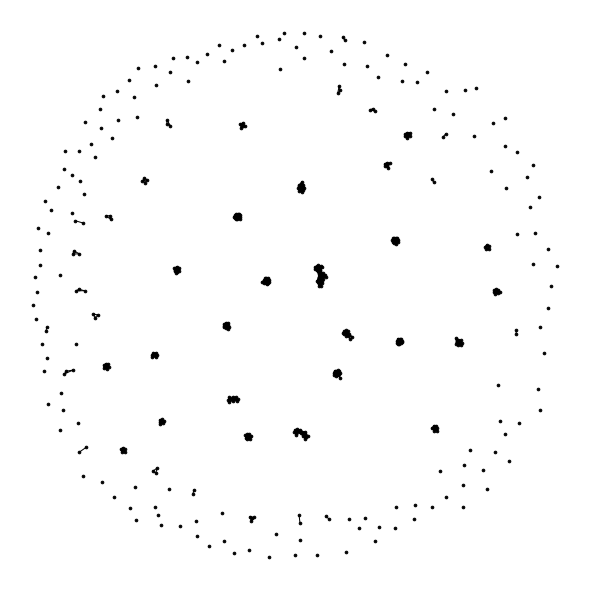

In [189]:
#G.remove_nodes_from(n for n, d in dict(G.degree()).items() if d < 1)
plt.figure(figsize=(8,8))
nx.draw_spring(G, with_labels=False, node_size=8, node_color='k', edge_color='black', font_size=8)
#plt.savefig('211216_final_construction.pdf', dpi = 300)

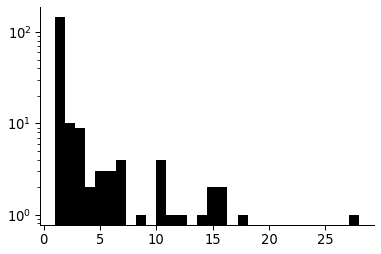

In [190]:
cluster_size = [len(a) for a in final_network]
plt.hist(cluster_size, bins = 30, color = 'k')
#plt.xticks(np.arange(0, 50, step=2))
plt.yscale('log')
sns.despine()
#plt.savefig('211216_final_construction_hist.pdf', dpi = 300)

In [191]:
len(final_network)

192

In [192]:
connected_trip = [a for a in final_network if len(a) > 1]
len(connected_trip)

45

### Check the mapped ones against computationally identified clusters

In [26]:
mapped_clone_1 = pd.read_csv('./data/clone1_barcodes_fuzzymatched_clean.tsv', sep = '\t', header= None)
#mapped_clone_2 = pd.read_csv('./data/clone2_barcodes_fuzzymatched_clean.tsv', sep = '\t')

In [27]:
mapped_clone_1 = mapped_clone_1.iloc[:, 0].to_list()

In [28]:
mapped_clone_1 

['ATACCGGTGTGGTCGT',
 'TTCAGATCGCACTCTA',
 'GCTATCTTTGGGCTTG',
 'GTTGATGTTAGTGCGC',
 'ACCTCGTGCAATCGTG',
 'AGTTACAATCATAAAG']

In [29]:
for tBC in mapped_clone_1:
    for clones in final_network:
        if tBC in clones:
            print(f'{tBC} is in {clones}')

ATACCGGTGTGGTCGT is in ['ATACCGGTGTGGTCGT']
TTCAGATCGCACTCTA is in ['TTATTACATTTAGTCA', 'TTCAGATCGCACTCTA', 'CCAGTCGTCAACAGAG']
GCTATCTTTGGGCTTG is in ['GCTATCTTTGGGCTTG']
GTTGATGTTAGTGCGC is in ['GTTGATGTTAGTGCGC']
ACCTCGTGCAATCGTG is in ['ACCTCGTGCAATCGTG']
AGTTACAATCATAAAG is in ['AGTTACAATCATAAAG']


In [30]:
mapped_clone_2 = pd.read_csv('./data/clone2_barcodes_fuzzymatched_clean.tsv', sep = '\t', header= None)

In [31]:
mapped_clone_2 = mapped_clone_2.iloc[:, 0].to_list()
for tBC in mapped_clone_2:
    for clones in final_network:
        if tBC in clones:
            print(f'{tBC} is in {clones}')

TAGGTGCGTCCTCGTA is in ['TGGTTTTGATATATCA', 'GTCGTCGGTGATGGAA', 'TACCTCGGCACCAATT', 'TAATTTTCTTCATACA', 'ATGGGTAAAAACGTCA', 'TCAAATAGCATGGGAC', 'CGCGAGTAGCGTTGGT', 'TAGGTGCGTCCTCGTA']
AATGCCGGAGTTGTTA is in ['AATGCCGGAGTTGTTA']
TTTCTTTACGATTTGT is in ['TTTCTTTACGATTTGT']
TTCAGATATGTGTTCA is in ['TTCAGATATGTGTTCA']
ATGGGTAAAAACGTCA is in ['TGGTTTTGATATATCA', 'GTCGTCGGTGATGGAA', 'TACCTCGGCACCAATT', 'TAATTTTCTTCATACA', 'ATGGGTAAAAACGTCA', 'TCAAATAGCATGGGAC', 'CGCGAGTAGCGTTGGT', 'TAGGTGCGTCCTCGTA']
GTCGTCGGTGATGGAA is in ['TGGTTTTGATATATCA', 'GTCGTCGGTGATGGAA', 'TACCTCGGCACCAATT', 'TAATTTTCTTCATACA', 'ATGGGTAAAAACGTCA', 'TCAAATAGCATGGGAC', 'CGCGAGTAGCGTTGGT', 'TAGGTGCGTCCTCGTA']
TTGAACATGGTTACTA is in ['TTGAACATGGTTACTA']
TAATTTTCTTCATACA is in ['TGGTTTTGATATATCA', 'GTCGTCGGTGATGGAA', 'TACCTCGGCACCAATT', 'TAATTTTCTTCATACA', 'ATGGGTAAAAACGTCA', 'TCAAATAGCATGGGAC', 'CGCGAGTAGCGTTGGT', 'TAGGTGCGTCCTCGTA']
